## Numerical integration of the 1D diffusion equation

The first part of the program is about the setting up the computation.A banded matrix A is defined as a 3 * $n_x$ element array. Using the Crank-Nicolson scheme the matrix A is populated. Vector B is set up which depends on P(x,t) at the current time t. And the implicit matrix is solved using equation:
$$
AP = B
$$


In the first part of the task, the normalised Dirac Delta is plotted. A function 'Solver' is created which takes in different values of spatial domain size, collision time and mean free path, which is used to obtain the subsquent density $P_{next}$. P(x,0) was normalised as the total density was obtained 1. However, P(x,t) was also plotted for various values of t, where it was observed that the total density approached 0 as t value was increased. The mean and variance of $P_{curr}$ was computed. It was observed that Mean was approaching zero which after a certain stable value and variance was increasing linearly with time which matched the theoritical prediction.


In the next part of the project, the Direct Delta function was shifted near the boundary, $\frac{x_i}{\delta{x}}$. As, before the plots were obtained. In addition to that, a calculation of the change in density was performed as a function of time, which was also plotted. In this case the mean and variance were also computed. As seen in the Density plots for different times, the density curve were seen too be broadning out with the increase in time which resulted in the nature of the shifted mean curve. The mean was found to slightyl increased at the begining and later on it was approaching a constant value. Similarly, a non-linear growth was seen in the shifted variance curve.
From calculation we obtained that the test statistic was 0.5 and corresponding p-value was 0. Since the p-value is less that .05, we reject the null hypothesis, ans thus we can confirm that the change in density doesn't follow normal distribution.
And the changes in density plot was also calculated as:
$$
\Delta P_{tot} = P_{tot,curr} - P_{tot,next}
$$

It was observed that a sudden spike was seen on (x position = 0). For different x position, there curve was flat zero.

In the last part of the experiment, the value of r was checked for different order of magnitude. It was oberved that, for the higher r value the crank-nicholson method was found to be very unstable. However, the lover r values resulted in stable nature of crank-nicholson method.

In [19]:
import numpy as np
from scipy.linalg import solve_banded
from scipy.sparse import lil_matrix
import matplotlib.pyplot as plt

n_x = 1000
delta_t = 1 
delta_x = 1
D = 0.9  #Diffusion Number
def solver (n_x, delta_t, delta_x, D):
    l = delta_x
 
    r = D*delta_t/(delta_x**2)
    x = []
    for i in range(n_x):
        a = i*delta_x
        x.append(a)
    P_curr = np.zeros(n_x)
    P_next = np.zeros(n_x)


    #Boundary condition for B
    B = np.zeros(n_x)
    
    A = lil_matrix((3,n_x))

    A[0] = [-r for i in range(n_x)]
    A_0 = (np.asarray(A.data)[0])
    A_0[0] = 0
    A[1] = [2*(1+r) for i in range(n_x)]
    A_1 = (np.asarray(A.data)[1])
    A[2] = [-r for i in range(n_x)]
    A_2 = (np.asarray(A.data)[2])
    A_2[n_x-1] = 0
    Ab = np.array([A_0, A_1, A_2])
    print(Ab.shape)

    #print(Ab)



    for i in range(1,n_x-1):
        B[i] = r*P_curr[i-1]+ 2*(1-r)*P_curr[i] + r*P_curr[i+1]




    P_next = solve_banded((1,1), Ab, B)
    
    
    #Density to be numerical "Dirac Delta"

    n_t = 10000
    P_curr[int(n_x/2)] = 1

    plt.plot(P_curr)
    plt.xlabel('Position')
    plt.ylabel('Density')
    plt.title('Dirac Delta density function')
    plt.show()
    
   
    print('Total Density =',(np.sum(P_curr)))

    plt.figure(figsize = (10,8))
    time = [10, 100, 1000, 5000]
    Mean = []
    Variance = []
    #Total_Density = []
    for j in range(1,n_t-1):
        for i in range(0,n_x-1):
            #Total_Density.append(np.sum(P_curr))
            B[i] = r*P_curr[i-1]+ 2*(1-r)*P_curr[i] + r*P_curr[i+1]
        #Total_Density.append(np.sum(P_curr))
        
        P_curr = solve_banded((1,1), Ab, B)
        if j in time:
            plt.plot(np.abs(P_curr), label = f't = {j}')
            plt.title('Density at various times')
        Mean.append(np.mean([x*p for x,p in enumerate(P_curr)]))
        Variance.append(np.mean([x**2*p for x,p in enumerate(P_curr)])-(np.mean([x*p for x,p in enumerate(P_curr)])**2))

    #print(Total_Density)    
    plt.legend()
    plt.show()
    print(len(P_curr))
    plt.plot(Mean)
    plt.xlabel('Number of times')
    plt.ylabel('Mean  of $P_{next}$')
    plt.show()



    plt.plot(Variance)
    plt.xlabel('Number of times')
    plt.ylabel('Variance  of $P_{next}$')
    plt.show()
    
   



   



    #for i in range(n_t -1):

    
    from scipy.stats import kstest

    #Shifting the initial Dirac Delta function
    P_curr = np.zeros(n_x)
    P_curr[10] = 1

    print('Total Density for shifted function=', np.sum(P_curr))

    Mean1 = []
    Variance1= []
    delta_P = []
    plt.figure(figsize = (10,8))
    time = [10, 100,200,500,700,900,1000]
    for j in range(1,n_t-1):
        for i in range(1,n_x-1):
            B[i] = r*P_curr[i-1]+ 2*(1-r)*P_curr[i] + r*P_curr[i+1]

       
        if j in time:
            plt.plot(np.abs(P_curr), label = f't = {j}')
            
            plt.title('Shifted Density at various times')
        P_next = solve_banded((1,1), Ab, B)
        Mean1.append(np.mean([x*p for x,p in enumerate(P_next)]))
        Variance1.append(np.mean([x**2*p for x,p in enumerate(P_next)])-(np.mean([x*p for x,p in enumerate(P_next)])**2))
        delta_P.append((np.sum(P_curr) - np.sum(P_next)))
        P_curr = P_next
        
    plt.legend()
    plt.show()
    #KS test
    ks = kstest(delta_P, "norm")
    print(ks)



    plt.plot(P_curr)
    plt.xlabel('Position')
    plt.ylabel(' Shifted Density')
    plt.title('Shifted Dirac Delta density function')
    plt.show()
    
    plt.plot(Mean1)
    plt.xlabel('Number of times')
    plt.ylabel('Shifted Mean  of $P_{next}$')
    plt.show()

    plt.plot(Variance1)
    plt.xlabel('Number of times')
    plt.ylabel('Shifted Variance  of $P_{next}$')
    plt.show()


    plt.plot(delta_P)
    plt.xlabel('Change in Density')
    plt.ylabel('time')
    plt.show()




(3, 1000)


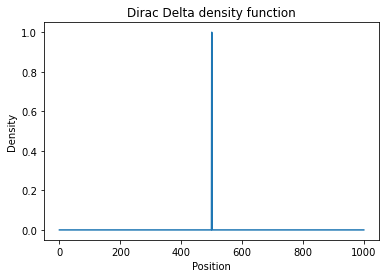

Total Density = 1.0


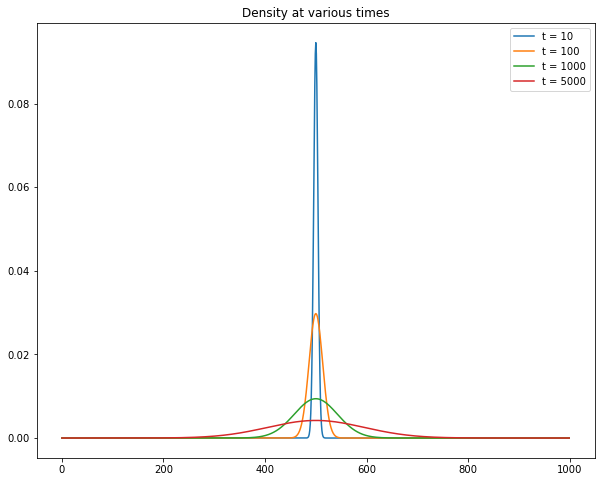

1000


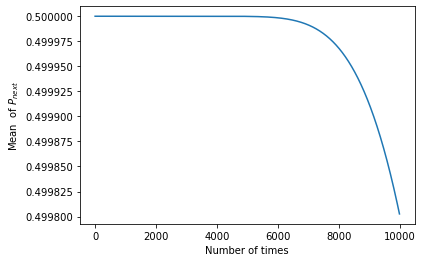

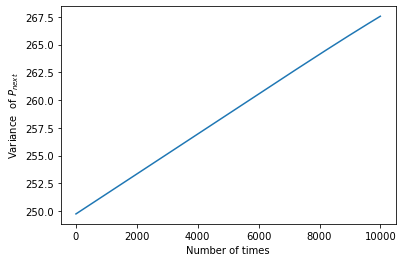

Total Density for shifted function= 1.0


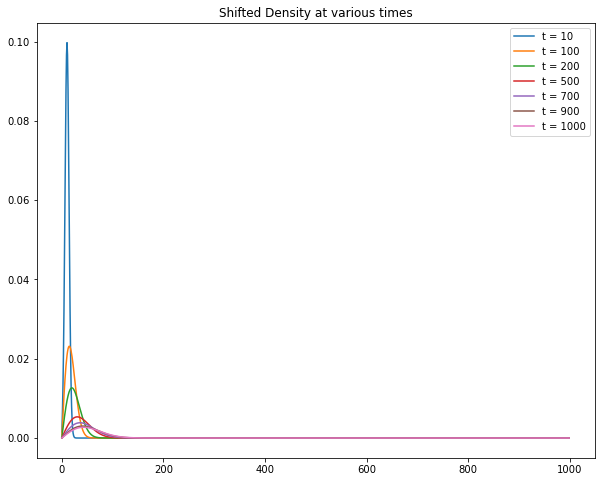

KstestResult(statistic=0.5000001495018926, pvalue=0.0)


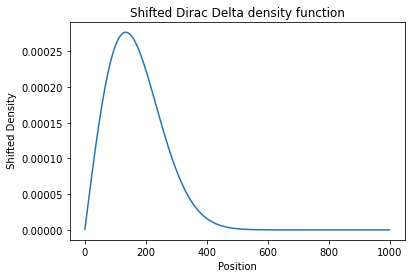

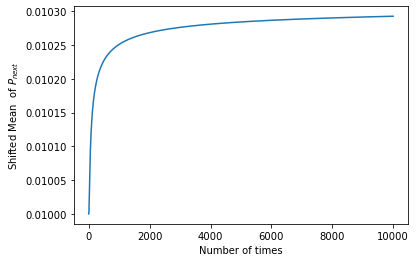

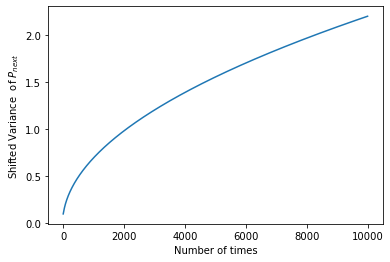

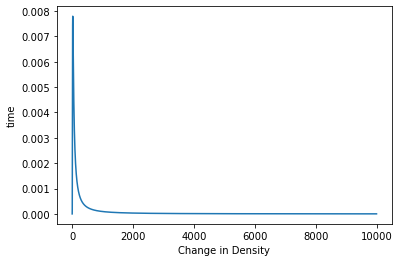

In [17]:
solver (n_x, delta_t, delta_x, D)


(3, 1000)


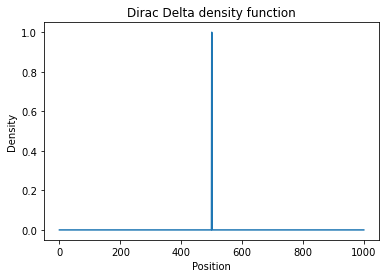

Total Density = 1.0


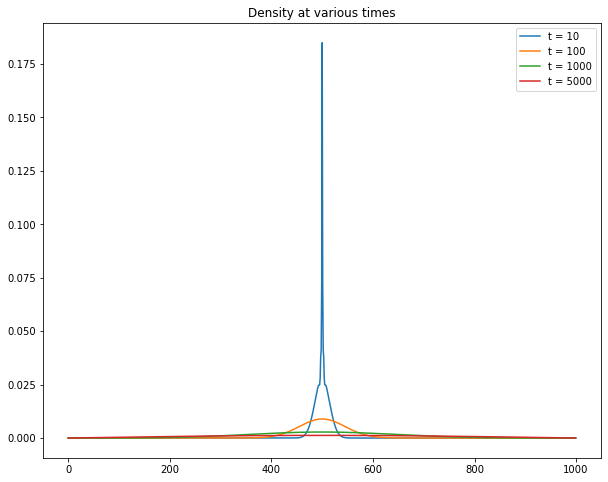

1000


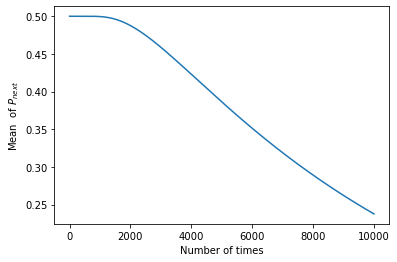

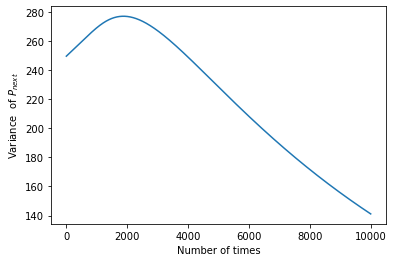

Total Density for shifted function= 1.0


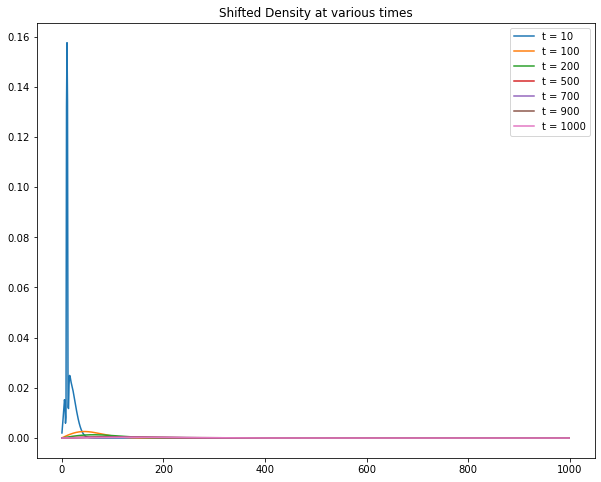

KstestResult(statistic=0.5000006295390635, pvalue=0.0)


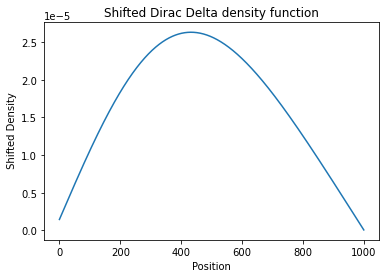

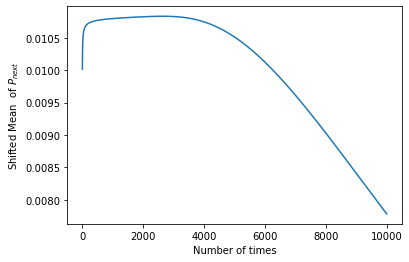

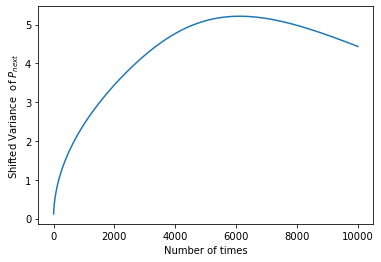

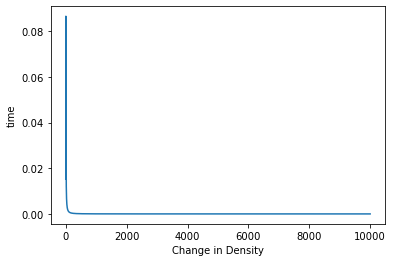

In [18]:
solver (n_x, delta_t, delta_x, 10)